# Question 2

In [2]:
import numpy as np

Find the least squares estimator $\hat{\beta}$ for the linear regression model $ Y = X \beta + \epsilon$.

In [24]:
xi = np.array([i/2 for i in range(10)])
X = [[1, xi, xi**2 ] for xi in xi]

Y = np.array([.21, -1.46, -3.04, -3.21, -5.04, -5.37, -6.03, -7.21, -7.46, -7.96])

beta_hat = np.linalg.inv(np.dot(np.transpose(X), X)).dot(np.dot(np.transpose(X), Y))
print("beta_hat = ", beta_hat)

beta_hat =  [-0.00372727 -2.80077273  0.23136364]


Same code from question 1: 

In [10]:
def orthog_poly(n, xi):
    # Define the first two orthogonal polynomials
    psi = []
    phi = []
    psi.append(lambda t: np.ones_like(t))
    psi.append(lambda t: t - np.mean(t))

    for i in range(2, n+1):
        a = np.sum(xi*(psi[i-1](xi))**2)/np.sum((psi[i-1](xi))**2)
        b = np.sum(psi[i-1](xi)**2)/np.sum(psi[i-2](xi)**2)
        
        psi.append(lambda t, i=i, a=a, b=b: (t - a)*psi[i-1](t) - b*psi[i-2](t))
    
    for i in range(n + 1):
        phi.append(lambda t, i=i: psi[i](t)/np.sqrt(np.sum(psi[i](xi)**2)))    
    
    return phi
   

In [11]:
X_orth =np.array( [q(xi) for q in orthog_poly(2, xi)]).T
print("Is X_orth orthogonal? ",
    np.all(np.isclose(X_orth.T @ X_orth, np.eye(2 + 1))))

Is X_orth orthogonal?  True


In [25]:
beta_hat_orth = X_orth.T @ Y
print("Beta_hat for orthogonal case = ", beta_hat_orth)

Beta_hat for orthogonal case =  [-14.72672706  -7.99134549   1.3290829 ]


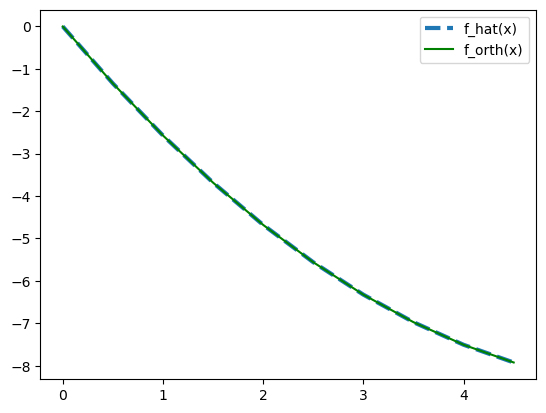

In [ ]:
import matplotlib.pyplot as plt
plt.plot(xi, X @ beta_hat, label='f_hat(x)', linestyle='--', linewidth=3)
plt.plot(xi, X_orth @ beta_hat_orth, label='f_orth(x)', color='green')
plt.legend()
plt.show()

Yes, a quadratic equation using the method of orthogonal polynomial produces the same model (see graph above). 